# 2D plane orthotropic phase field code developed by Dr. Rahaman 

In [1]:
using Dates
timet1 = time()

1.667186993234277e9

In [2]:
using  SymPy
using  Plots; pyplot()
using LinearAlgebra

In [3]:
E₁ = 377.7e3
E₂ = 37.7e3
ν₁ = 0.2
ν₂ = 0.22
h = 0.5

0.5

In [4]:
const t = 1.0

1.0

In [5]:
ht = 1
Eᵢ = 37.7e3
Eₘ = 377.7e3
νᵢ = 0.22
νₘ = 0.2
@show λᵢ = Eᵢ*νᵢ/((1+νᵢ)*(1-2*νᵢ))
@show λₘ = Eₘ*νₘ/((1+νₘ)*(1-2*νₘ))
@show μᵢ = Eᵢ/(2*(1+νᵢ))
@show μₘ = Eₘ/(2*(1+νₘ))

λᵢ = (Eᵢ * νᵢ) / ((1 + νᵢ) * (1 - 2νᵢ)) = 12139.929742388758
λₘ = (Eₘ * νₘ) / ((1 + νₘ) * (1 - 2νₘ)) = 104916.66666666667
μᵢ = Eᵢ / (2 * (1 + νᵢ)) = 15450.819672131149
μₘ = Eₘ / (2 * (1 + νₘ)) = 157375.0


157375.0

In [6]:
Gᵢ = 1
Gₘ = 10
L = 20
H = 20
η = 1e-10
Gc = 5

5

In [7]:
x,x₁,y,y₁ = symbols("x,x₁,y,y₁", real = true)

(x, x₁, y, y₁)

In [8]:
sign(0)

0

In [9]:
heaviside(x) = 0.5 * (sign(x) + 1)

interval(x, a, b) = heaviside(x-a) - heaviside(x-b)

wₕ(x,x₁) = (1/(sqrt(2*pi)*h))*exp(-(x-x₁)^2/(2*h^2))

wₕ (generic function with 1 method)

In [10]:
λFx1 = interval(x₁,-L-ht,L+ht)*wₕ(x,x₁)
λFy1 = interval(y₁,-H-ht,0)*wₕ(y,y₁)
λFy2 = interval(y₁,0,H+ht)*wₕ(y,y₁)

μFx1 = interval(x₁,-L-ht,L+ht)*wₕ(x,x₁)
μFy1 = interval(y₁,-H-ht,0)*wₕ(y,y₁)
μFy2 = interval(y₁,0,H+ht)*wₕ(y,y₁)

λdiscont1 = λᵢ * interval(x₁,-L-ht,L+ht)* interval(y₁,-H-ht,0)
λdiscont2 = λₘ * interval(x₁,-L-ht,L+ht)* interval(y₁,0,H+ht)
λdiscont = λdiscont1 + λdiscont2

μdiscont1 = μᵢ * interval(x₁,-L-ht,L+ht)* interval(y₁,-H-ht,0)
μdiscont2 = μₘ * interval(x₁,-L-ht,L+ht)* interval(y₁,0,H+ht)
μdiscont = μdiscont1 + μdiscont2

Gdiscont1 = Gᵢ * interval(x₁,-L-ht,L+ht)* interval(y₁,-H-ht,0)
Gdiscont2 = Gₘ * interval(x₁,-L-ht,L+ht)* interval(y₁,0,H+ht)
Gdiscont = Gdiscont1 + Gdiscont2

smoothλ1 = integrate(λFx1,(x₁,-L-ht,L+ht))*integrate(λFy1,(y₁,-H-ht,H+ht))*λᵢ
smoothλ2 = integrate(λFx1,(x₁,-L-ht,L+ht))*integrate(λFy2,(y₁,-H-ht,H+ht))*λₘ
smoothλ = smoothλ1 + smoothλ2

smoothμ1 = integrate(μFx1,(x₁,-L-ht,L+ht))*integrate(μFy1,(y₁,-H-ht,H+ht))*μᵢ
smoothμ2 = integrate(μFx1,(x₁,-L-ht,L+ht))*integrate(μFy2,(y₁,-H-ht,H+ht))*μₘ
smoothμ = smoothμ1 + smoothμ2

smoothG1 = integrate(μFx1,(x₁,-L-ht,L+ht))*integrate(μFy1,(y₁,-H-ht,H+ht))*Gᵢ
smoothG2 = integrate(μFx1,(x₁,-L-ht,L+ht))*integrate(μFy2,(y₁,-H-ht,H+ht))*Gₘ
smoothG = smoothG1 + smoothG2

(-0.282094791773878⋅√π⋅erf(1.4142135623731⋅y) + 0.282094791773878⋅√π⋅erf(1.414
2135623731⋅y + 29.698484809835))⋅(-0.282094791773878⋅√π⋅erf(1.4142135623731⋅x 
- 29.698484809835) + 0.282094791773878⋅√π⋅erf(1.4142135623731⋅x + 29.698484809
835)) + 10⋅(0.282094791773878⋅√π⋅erf(1.4142135623731⋅y) - 0.282094791773878⋅√π
⋅erf(1.4142135623731⋅y - 29.698484809835))⋅(-0.282094791773878⋅√π⋅erf(1.414213
5623731⋅x - 29.698484809835) + 0.282094791773878⋅√π⋅erf(1.4142135623731⋅x + 29
.698484809835))

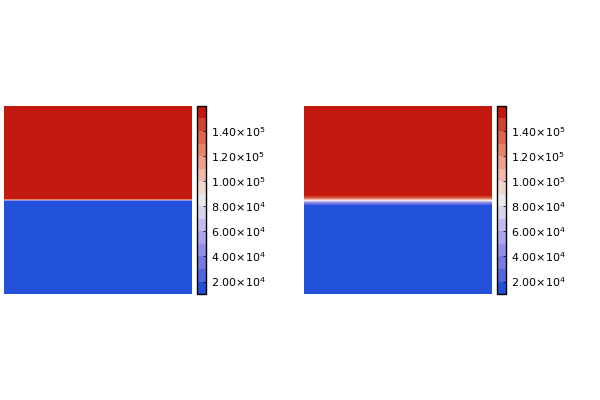

sys:1: UserWarning: The following kwargs were not used by contour: 'label'


In [11]:
xs = range(-L,L, length=100)
ys = range(-H,H, length=100)

plot1 = contourf(xs, ys, λdiscont, c=:diverging_bwr_40_95_c42_n256, axis = nothing, showaxis =false,aspect_ratio=:equal, camera=(0,90))
plot2 = contourf(xs, ys, smoothλ, c=:diverging_bwr_40_95_c42_n256, axis = nothing, showaxis =false,aspect_ratio=:equal,camera=(0,90))
plot3 = contourf(xs, ys, μdiscont, c=:diverging_bwr_40_95_c42_n256, axis = nothing, showaxis =false,aspect_ratio=:equal, camera=(0,90))
plot4 = contourf(xs, ys, smoothμ, c=:diverging_bwr_40_95_c42_n256, axis = nothing, showaxis =false,aspect_ratio=:equal, camera=(0,90))
plot5 = contourf(xs, ys, Gdiscont, c=:diverging_bwr_40_95_c42_n256, axis = nothing, showaxis =false,aspect_ratio=:equal, camera=(0,90))
plot6 = contourf(xs, ys, smoothG, c=:diverging_bwr_40_95_c42_n256, axis = nothing, showaxis =false,aspect_ratio=:equal, camera=(0,90))
plot(plot1,plot2)
plot(plot3,plot4)
#plot(plot5,plot6)

In [12]:
using Gmsh:gmsh
using LinearAlgebra
using PyPlot
using WriteVTK
using SparseArrays
using Printf
using MinFEM
using Gridap
using GridapGmsh

In [13]:
lsp = 0.3
hf = lsp/2.2
hd = 10*hf
Lₚ = 40.0
Hₚ = 40.0
rc = 2

2

In [14]:
gmsh.initialize()
gmsh.option.setNumber("General.Terminal", 1)

gmsh.model.geo.addPoint(-Lₚ/2, -Hₚ/2, 0.0, hd, 1)
gmsh.model.geo.addPoint(-rc, -Hₚ/2, 0.0, hf, 2)
gmsh.model.geo.addPoint(0, -Hₚ/2, 0.0, hf, 3)
gmsh.model.geo.addPoint(rc, -Hₚ/2, 0.0, hf, 4)
gmsh.model.geo.addPoint(Lₚ/2, -Hₚ/2, 0.0, hd, 5)
gmsh.model.geo.addPoint(Lₚ/2, 0.0, 0.0, hd, 6)
#gmsh.model.geo.addPoint(Lₚ/2, 2*ls, 0.0, hd, 7)
gmsh.model.geo.addPoint(Lₚ/2, Hₚ/2, 0.0, hd, 8)
gmsh.model.geo.addPoint(-Lₚ/2, Hₚ/2, 0.0, hd, 9)
gmsh.model.geo.addPoint(-Lₚ/2, 0.0, 0.0, hd, 10)
#gmsh.model.geo.addPoint(-Lₚ/2, -2*ls, 0.0, hd, 11)

gmsh.model.geo.addLine(1, 2, 1)
gmsh.model.geo.addCircleArc(4, 3, 2, 2)
gmsh.model.geo.addLine(4, 5, 3)
gmsh.model.geo.addLine(5, 6, 4)
gmsh.model.geo.addLine(6, 8, 5)
gmsh.model.geo.addLine(8, 9, 6)
gmsh.model.geo.addLine(9, 10, 7)
gmsh.model.geo.addLine(10, 1, 8)

gmsh.model.geo.addLine(6, 10, 9)
#gmsh.model.geo.addLine(7, 10, 12)

gmsh.model.geo.addCurveLoop([1,-2,3,4,9,8],1)
gmsh.model.geo.addCurveLoop([5,6,7,-9],2)

gmsh.model.geo.addPlaneSurface([1], 1)
gmsh.model.geo.addPlaneSurface([2], 2)
#gmsh.model.geo.addPlaneSurface([1,2], 3)

gmsh.model.addPhysicalGroup(1, [6],1)
gmsh.model.addPhysicalGroup(1, [7,8],2)
gmsh.model.addPhysicalGroup(1, [4,5],3)

gmsh.model.addPhysicalGroup(2, [1],1)
gmsh.model.addPhysicalGroup(2, [2],2)
#gmsh.model.addPhysicalGroup(2, [3],3)

gmsh.model.setPhysicalName(2, 1, "MatrixB")
gmsh.model.setPhysicalName(2, 2, "MatrixA")
#gmsh.model.setPhysicalName(2, 3, "Domain")

gmsh.model.setPhysicalName(1, 1, "DirichletTop")
gmsh.model.setPhysicalName(1, 2, "DirichletLeft")
gmsh.model.setPhysicalName(1, 3, "DirichletRight")


gmsh.model.mesh.field.add("Box", 11)
gmsh.model.mesh.field.setNumber(11, "VIn", hf)
gmsh.model.mesh.field.setNumber(11, "VOut", hd)
gmsh.model.mesh.field.setNumber(11, "XMin", -0.5*Lₚ)
gmsh.model.mesh.field.setNumber(11, "XMax", 0.5*Lₚ)
gmsh.model.mesh.field.setNumber(11, "YMin", -2*lsp)
gmsh.model.mesh.field.setNumber(11, "YMax", 2*lsp)
gmsh.model.mesh.field.setAsBackgroundMesh(11)

gmsh.model.geo.synchronize()
gmsh.model.mesh.generate(2)

gmsh.write("RectangularComposite.msh")
gmsh.finalize()

Info    : Meshing 1D...
Info    : [  0%] Meshing curve 1 (Line)
Info    : [ 20%] Meshing curve 2 (Circle)
Info    : [ 30%] Meshing curve 3 (Line)
Info    : [ 40%] Meshing curve 4 (Line)
Info    : [ 50%] Meshing curve 5 (Line)
Info    : [ 60%] Meshing curve 6 (Line)
Info    : [ 70%] Meshing curve 7 (Line)
Info    : [ 80%] Meshing curve 8 (Line)
Info    : [ 90%] Meshing curve 9 (Line)
Info    : Done meshing 1D (Wall 0.00557598s, CPU 0.005417s)
Info    : Meshing 2D...
Info    : [  0%] Meshing surface 1 (Plane, Frontal-Delaunay)
Info    : [ 50%] Meshing surface 2 (Plane, Frontal-Delaunay)
Info    : Done meshing 2D (Wall 0.536786s, CPU 0.536664s)
Info    : 16097 nodes 32493 elements
Info    : Writing 'RectangularComposite.msh'...
Info    : Done writing 'RectangularComposite.msh'


In [15]:
model = GmshDiscreteModel("RectangularComposite.msh")
writevtk(model ,"RectangularComposite")

Info    : Reading 'RectangularComposite.msh'...
Info    : 20 entities
Info    : 16096 nodes
Info    : 32075 elements
Info    : Done reading 'RectangularComposite.msh'


3-element Vector{Vector{String}}:
 ["RectangularComposite_0.vtu"]
 ["RectangularComposite_1.vtu"]
 ["RectangularComposite_2.vtu"]

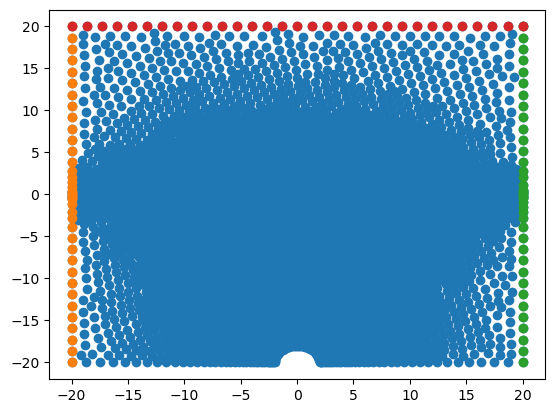

PyObject <matplotlib.collections.PathCollection object at 0x7fa515194dc0>

In [16]:
mesh = import_mesh("RectangularComposite.msh")
NodesCoord = mesh.Nodes
Nₙ = size(NodesCoord,1)
nodeCoordX = [NodesCoord[i][1] for i in 1:Nₙ]
nodeCoordY = [NodesCoord[i][2] for i in 1:Nₙ]
coord = [nodeCoordX nodeCoordY]
elem = mesh.Elements
Nₑ = size(elem,1)

xl = minimum(coord[:,1])
xr = maximum(coord[:,1])
yb = minimum(coord[:,2])
yt = maximum(coord[:,2])
bbNdLeft = coord[:,1][coord[:,1] .<= xl+1e-6]
bbNdRight = coord[:,1][coord[:,1] .>= xr-1e-6]
bbNdTop = coord[:,2][coord[:,2] .>= yt-1e-6]

data = tuple(coord[1,:]...)
for i in 2:Nₙ
data = [data; tuple(coord[i,:]...)]
end
idxLB = findall(((x,y),) -> x in bbNdLeft, data)
idxRB = findall(((x,y),) -> x in bbNdRight, data)
idxTB = findall(((x,y),) -> y in bbNdTop, data)

idxForce = idxRB 

PyPlot.scatter(coord[:,1],coord[:,2], label = "Dom")
PyPlot.scatter(coord[idxLB,1],coord[idxLB,2], label = "LeftSupport")
PyPlot.scatter(coord[idxRB,1],coord[idxRB,2], label = "LoadLine")
PyPlot.scatter(coord[idxTB,1],coord[idxTB,2],label = "TopSupport")

In [17]:
λExp = lambdify(smoothλ)
μExp = lambdify(smoothμ)
GExp = lambdify(Gdiscont)

#118 (generic function with 1 method)

In [18]:
λVal = zeros(Float64,Nₙ,1)
μVal = zeros(Float64,Nₙ,1)
GVal = zeros(Float64,Nₙ,1)

for i in 1:Nₙ
    λVal[i] = λExp.(NodesCoord[i][1],NodesCoord[i][2])
    μVal[i] = μExp.(NodesCoord[i][1],NodesCoord[i][2])
    GVal[i] = GExp.(NodesCoord[i][1],NodesCoord[i][2])
end

## Input Parameters 

In [19]:
const DOFᵤ = 2
const DOFₙ = DOFᵤ 
const TElₜ = 3 
const HPₙ = 3

3

In [20]:
function hammer(nhpt)

samp = zeros(Float64,nhpt,3)
if nhpt == 1
    samp=[1/3 1/3 1/2];
elseif  nhpt == 3
    samp=[1/6 1/6 1/6; 
        2/3 1/6 1/6; 
        1/6 2/3 1/6]
elseif nhpt == 4
    samp= [1/3 1/3 -27/96; 
        1/5 1/5 25/96;
        3/5 1/5 25/96;
        1/5 3/5 25/96]
end
    return samp
end

samp = hammer(HPₙ)

3×3 Matrix{Float64}:
 0.166667  0.166667  0.166667
 0.666667  0.166667  0.166667
 0.166667  0.666667  0.166667

In [21]:
function ShapeFunStrainDispMatrix(ElType,ξ,η,coordEl,DOF)   
    N = zeros(Float64,1,ElType)
    dN_dξ = zeros(Float64,1,ElType)
    dN_dη = zeros(Float64,1,ElType)
    B₀ = zeros(Float64,2,ElType)
    J = zeros(Float64,2,2)
    JinvB₀ = zeros(Float64,2,ElType)
    Bᵤ = zeros(Float64,ElType,DOF*ElType)
    if ElType == 3
        N[1,1] = 1 - ξ -η
        N[1,2] = ξ
        N[1,3] = η
        dN_dξ[1,1]  = -1.0
        dN_dξ[1,2]  = 1.0
        dN_dξ[1,3]  = 0.0
        dN_dη[1,1]  = -1.0
        dN_dη[1,2]  = 0.0
        dN_dη[1,3]  = 1.0
        B₀ = [dN_dξ; dN_dη]
        J = [dN_dξ; dN_dη]*coordEl
        JinvB₀ = inv(J)*B₀
        Bᵤ = [JinvB₀[1,:]'   zeros(1,ElType); zeros(1,ElType)  JinvB₀[2,:]'; JinvB₀[2,:]'  JinvB₀[1,:]']
    return  J,JinvB₀,N,Bᵤ 
  end
end

ShapeFunStrainDispMatrix (generic function with 1 method)

In [22]:
function PhaseFieldStiffMatStrEnePos(disp,PrvStrEnerPos)
        kfp = spzeros(Float64,Nₙ,Nₙ)
        fpf = zeros(Float64,Nₙ,1) 
        StrEnerPos = zeros(Float64,Nₑ*HPₙ,1)
    for iel in 1:Nₑ
       ndIndx = elem[iel]
       stIndex = (((iel-1)*HPₙ) .+ 1:(iel*HPₙ))
       coordEl = coord[ndIndx,:]
       dispEl =  disp[ndIndx,:] 
       PrvStrEnerPosEl  = PrvStrEnerPos[stIndex]
    λNode =   λVal[ndIndx,:]
    μNode =   μVal[ndIndx,:]
    GNode =   GVal[ndIndx,:]
    Kefp = zeros(Float64,TElₜ,TElₜ)
    fepf = zeros(Float64,TElₜ,1) 
    strEnePosEl = zeros(Float64,HPₙ,1)      
    for i = 1:HPₙ
    ξ = samp[i,1]
    η = samp[i,2]
    wt = samp[i,3]
    J,JinvB₀,N,Bᵤ = ShapeFunStrainDispMatrix(TElₜ,ξ,η,coordEl,DOFₙ)
    detJ = det(J)
    Gm = N*GNode
    λd = N*λNode
    μd = N*μNode
    Gc = Gm[1]
    strain = Bᵤ*[dispEl[:,1]' dispEl[:,2]']'
    l=(strain[1] .+ strain[2])
    εArray = [strain[1] strain[3];strain[3] strain[2]]
    Λ, P = eigen(εArray)
    ε1 = Λ[1]
    ε2 = Λ[2]
    if ε1 >= 0 &&  ε2 >= 0
        Λpos = [ε1 0; 0 ε2]
        Λneg = [0 0; 0 0]
    elseif ε1 >= 0 &&  ε2 < 0
        Λpos = [ε1 0; 0 0]
        Λneg = [0 0; 0 ε2]
    elseif ε1 < 0 &&  ε2 >= 0
        Λpos = [0 0; 0 ε2]
        Λneg = [ε1 0; 0 0]
    elseif ε1 < 0 &&  ε2 < 0
        Λpos = [0 0; 0 0]
        Λneg = [ε1 0; 0 ε2]
    end
    εPos = P*Λpos*P'
    εNeg = P*Λneg*P'
    ContractStrain = 0
            for i=1:2
                for j = 1:2
                    ContractStrain = ContractStrain + εPos[i,j]*εPos[i,j]
                end
            end
    if l .>= 0
                strEnePosEl[i] = 0.5*λd[1]*l^2 + μd[1]*ContractStrain
    elseif l .< 0
                strEnePosEl[i] = μd[1]*ContractStrain
    end 
        if PrvStrEnerPosEl[i] .>  strEnePosEl[i]            
        strEnePosEl[i] = PrvStrEnerPosEl[i]
        end
    A = Matrix{Float64}(I,2,2)
    Kefp = Kefp .+ t*wt*detJ*lsp*Gc*(JinvB₀'*A*JinvB₀)
    Kefp = Kefp .+ t*wt*detJ*2*strEnePosEl[i]*(N'*N)
    Kefp = Kefp .+ t*wt*detJ*(Gc/lsp)*(N'*N)
        
    fepf = fepf .+ t*wt*detJ*(Gc/lsp)*N' 
    end      
    kfp[ndIndx[:,1],ndIndx[:,1]] = kfp[ndIndx[:,1],ndIndx[:,1]] .+ Kefp
    fpf[ndIndx[:,1]] = fpf[ndIndx[:,1]] .+  fepf
    StrEnerPos[stIndex] =  strEnePosEl  
    end
    return kfp,fpf,StrEnerPos
end

PhaseFieldStiffMatStrEnePos (generic function with 1 method)

ndIndx = elem[1]
phiEl =   Eval[ndIndx,:]
phiNewEl =   νVal[ndIndx,:]
Ed = N*phiEl
νd = N*phiNewEl
νd[1]
Dc(Ed[1],νd[1])

In [23]:
function ElasStiffMat(disp,PhaseField)
    
    KG = spzeros(Float64,DOFₙ*Nₙ,DOFₙ*Nₙ)  
    eps = 1e-10
    
    for iel in 1:Nₑ
    ndIndx = elem[iel]
    elDOF = [ndIndx ; ndIndx .+ Nₙ*ones(Int64,TElₜ,1)]
    dispEl =  disp[ndIndx,:] 
    coordEl = coord[ndIndx,:]
    phiEl =   PhaseField[ndIndx,:]                 
    λNode =   λVal[ndIndx,:]
    μNode =   μVal[ndIndx,:]
    GNode =   GVal[ndIndx,:]
        
    Kᵤᵤ = zeros(Float64,DOFₙ*TElₜ,DOFₙ*TElₜ)            
    for i = 1:HPₙ 
    ξ = samp[i,1]
    η = samp[i,2]
    wt = samp[i,3]
    J,JinvB₀,N,Bᵤ = ShapeFunStrainDispMatrix(TElₜ,ξ,η,coordEl,DOFₙ)
    detJ = det(J)
    strain = Bᵤ*[dispEl[:,1]' dispEl[:,2]']'  
    gpPhiEl =  N*phiEl
    λd = N*λNode
    μd = N*μNode
    Gm = N*GNode
    pfsh = gpPhiEl[1,1].^2 .+ eps  #g_s
    Dmod = [λd[1]+2*μd[1]  λd[1]  0; λd[1]  λd[1]+2*μd[1]  0;0  0  2*μd[1]]*pfsh                
    Kᵤᵤ = Kᵤᵤ .+ t*wt*Bᵤ'*Dmod*Bᵤ*detJ
    end
    KG[elDOF[:,1],elDOF[:,1]] = KG[elDOF[:,1],elDOF[:,1]] .+ Kᵤᵤ
    end   
    return KG
end

ElasStiffMat (generic function with 1 method)

## FE formulation

In [24]:
const vAppMax = 0.20

Load = Float64[]
Displacement = Float64[]

cell = MeshCell(VTKCellTypes.VTK_TRIANGLE, elem[1])
for iel in 2:Nₑ
c = MeshCell(VTKCellTypes.VTK_TRIANGLE, elem[iel])
cell = [cell; c]
end

In [25]:
count = 0 
v = 0
delv = 1e-3
innerMax = 20

uv = zeros(Float64,2*Nₙ,1)
disp = zeros(Float64,Nₙ,2)
StrEnerPos = zeros(Float64,Nₑ*HPₙ,1)
PrvStrEnerPos = zeros(Float64,Nₑ*HPₙ,1)
PhaseField = zeros(Float64,Nₙ,1)
KG = spzeros(Float64,DOFₙ*Nₙ,DOFₙ*Nₙ)
Force = zeros(Float64,DOFₙ*Nₙ,1)

timet3 = time()
while v .< vAppMax 
   count = count .+ 1
    v = v .+ delv;
    print("\n Entering displacemtent step :", float(v))
    
  for inner = 1:innerMax
        
      kfp,fpf,StrEnerPos = PhaseFieldStiffMatStrEnePos(disp,PrvStrEnerPos) 
      PrvStrEnerPos = StrEnerPos 

      err = sqrt((kfp*PhaseField - fpf)'*(kfp*PhaseField - fpf))[1]
      print("\n error = ",float(err))
               
      PhaseField = kfp\fpf     

      KG = ElasStiffMat(disp,PhaseField)

            DOFbbLeftUV = idxLB
            DOFbbRightV = idxRB

            DOFtbV = idxTB .+ Nₙ*ones(Int64,size(idxTB,1),1)
            GenDispDOF = [DOFbbLeftUV; DOFbbRightV; DOFtbV]
            TotDOF = collect(1:1:2*Nₙ)
            UnDOF = setdiff(TotDOF,GenDispDOF)
            uvb = [zeros(Float64,size(idxLB,1),1); v*ones(Float64,size(idxRB,1),1); zeros(Float64,size(idxTB,1),1)]
            uvd = -(KG[UnDOF,UnDOF])\(KG[UnDOF,GenDispDOF[:,1]]*uvb)
            uv[UnDOF] = uvd
            uv[GenDispDOF] = uvb
            disp[:,1] = uv[1:Nₙ]
            disp[:,2] = uv[Nₙ+1:2*Nₙ]
      
        if err < 1e-3
            break      
        end 
  end
Force = KG*uv  
Node_Force = Force[idxForce]        

push!(Load, sum(Node_Force))
push!(Displacement, v)

vtk_grid("./Results_PhaseFieldBeamWithNotch$count",coord[:,1],coord[:,2],cell) do vtk 
        vtk["u", VTKPointData()] = uv[1:Nₙ]
        vtk["v", VTKPointData()] = uv[Nₙ+1:2*Nₙ]
        vtk["PhaseField",VTKPointData()] = PhaseField 
        end
end
timet4 = time()


 Entering displacemtent step :0.001
 error = 791.8234971405954
 error = 0.005540897262137013
 error = 1.126005166269233e-9
 Entering displacemtent step :0.002
 error = 2.242197831655444e-13
 Entering displacemtent step :0.003
 error = 0.01662257539315934
 error = 0.02770371223834974
 error = 5.0681162648680146e-8
 Entering displacemtent step :0.004
 error = 2.5763565774974775e-11
 Entering displacemtent step :0.005
 error = 0.038783831949412644
 error = 0.04986250366964968
 error = 2.5365028832418813e-7
 Entering displacemtent step :0.006
 error = 3.5826861529917776e-10
 Entering displacemtent step :0.007
 error = 0.06093917576824952
 error = 0.07201356041897404
 error = 7.193581158934526e-7
 Entering displacemtent step :0.008
 error = 1.9927730039401107e-9
 Entering displacemtent step :0.009000000000000001
 error = 0.0830848739009359
 error = 0.09415317564406328
 error = 1.5589340588054668e-6
 Entering displacemtent step :0.010000000000000002
 error = 7.145285656799456e-9
 Entering d

 Entering displacemtent step :0.10000000000000007
 error = 0.02289972896873771
 error = 1.0051269955678104
 error = 0.03667423844646833
 error = 0.03238612921204919
 error = 0.030200854820948753
 error = 0.028217522353271848
 error = 0.026371024750370807
 error = 0.02468186358475795
 error = 0.023156117017996216
 error = 0.021778870959601942
 error = 0.02053017691972718
 error = 0.019409438469522894
 error = 0.018423595776366066
 error = 0.017581020779994804
 error = 0.01688792390901539
 error = 0.016346404757975556
 error = 0.015953560699897756
 error = 0.01570173569447847
 error = 0.015578094639421752
 error = 0.015566194885059228
 Entering displacemtent step :0.10100000000000008
 error = 0.015647884486353587
 error = 1.0198746447381382
 error = 0.0324756970953053
 error = 0.030497329828357397
 error = 0.03061347777537708
 error = 0.030804024294289824
 error = 0.030843133079168302
 error = 0.030587757811954365
 error = 0.029948468573203647
 error = 0.028903869800882557
 error = 0.027

 error = 0.03766950274870867
 error = 0.037594684940204105
 error = 0.03761298774662359
 error = 0.03770055415274747
 error = 0.03781312048869901
 error = 0.03792186360680776
 Entering displacemtent step :0.12600000000000008
 error = 0.03796588031390328
 error = 1.2117934674837567
 error = 0.05605328599814667
 error = 0.05335722333841418
 error = 0.05298023221404808
 error = 0.05285128204322411
 error = 0.052853143662180344
 error = 0.05295712369726584
 error = 0.05296796712108177
 error = 0.05259746080235348
 error = 0.051582168121463774
 error = 0.04991232163904414
 error = 0.04760998216819296
 error = 0.044796177899996736
 error = 0.041697241369012095
 error = 0.03856405299673921
 error = 0.03560885529888075
 error = 0.03297001208210635
 error = 0.03070992161426077
 error = 0.028907217813341938
 Entering displacemtent step :0.12700000000000009
 error = 0.027532745128994743
 error = 1.219745301422939
 error = 0.04410997729530568
 error = 0.039762089977538835
 error = 0.03847907361011

 error = 0.05694290109428854
 error = 0.055932077270047155
 error = 0.0564410784003772
 error = 0.0583223908205872
 error = 0.06118561431479207
 error = 0.06450971922234512
 error = 0.0675472983600994
 error = 0.06932993508293302
 error = 0.06921774060498649
 error = 0.06725119157264507
 Entering displacemtent step :0.1520000000000001
 error = 0.06398118090176926
 error = 1.3854913020713735
 error = 0.07748822004225633
 error = 0.06793023601761512
 error = 0.06410915588218521
 error = 0.06249072554422837
 error = 0.06218694017221554
 error = 0.062418727029097607
 error = 0.06232382545962364
 error = 0.06135432542355841
 error = 0.05916197419759256
 error = 0.055745417623707216
 error = 0.05129835328168062
 error = 0.04614938236769299
 error = 0.04072160752498256
 error = 0.035419516089354765
 error = 0.030544614321982088
 error = 0.02628891544912478
 error = 0.022710997112332917
 error = 0.01976724774349775
 Entering displacemtent step :0.1530000000000001
 error = 0.01733436506935268
 

 error = 0.03893954522566952
 error = 0.0212500145610058
 error = 0.014503623839572445
 error = 0.01118923885936015
 error = 0.00933863341360921
 error = 0.008179179041204583
 error = 0.0073673546017721915
 error = 0.006735331776894306
 error = 0.006205467859685312
 error = 0.005742595856223327
 error = 0.005330012044185828
 error = 0.004957009334346848
 error = 0.004616514528823426
 error = 0.004304373937612589
 error = 0.004017535781179079
 error = 0.003753712018475625
 error = 0.003511596559541334
 error = 0.0032876465665578067
 Entering displacemtent step :0.17800000000000013
 error = 0.003080082063895368
 error = 1.5658898441280606
 error = 0.040381208676403234
 error = 0.021887491047204135
 error = 0.014873673384152231
 error = 0.01153400622985468
 error = 0.009782236931326781
 error = 0.00876552096405458
 error = 0.00810605436438192
 error = 0.007627952960341358
 error = 0.007251392710300797
 error = 0.006941683302813208
 error = 0.006679192237777411
 error = 0.00645216687868453

1.66731644354173e9

In [26]:
vtk_grid("./MaterialProperty",coord[:,1],coord[:,2],cell) do vtk 
        vtk["lambda", VTKPointData()] = λVal[1:Nₙ]
        vtk["mu", VTKPointData()] = μVal[1:Nₙ]
        vtk["Gc", VTKPointData()] = GVal[1:Nₙ]
end

1-element Vector{String}:
 "./MaterialProperty.vtu"

In [27]:
Force

32192×1 Matrix{Float64}:
  0.0017880191794574785
  0.0
  1.0618173007514997e-12
 -0.0037609166501165747
  0.04953743118190035
  0.5581275074338685
 -0.727312073763847
  0.03520834672690398
  0.0
  0.0
  0.0
 -2.2737367544323206e-13
  2.2737367544323206e-13
  ⋮
  6.398437335519702e-12
  3.0446756227320293e-12
  1.1297629498585593e-12
  4.064304448547773e-12
 -4.732214620162267e-12
 -2.4424906541753444e-12
  1.964650664376677e-12
 -1.9895196601282805e-12
  3.4843239404835913e-12
  6.288303211476887e-13
 -1.0196288258157438e-12
  1.2603251775544777e-12

In [28]:
using Plots

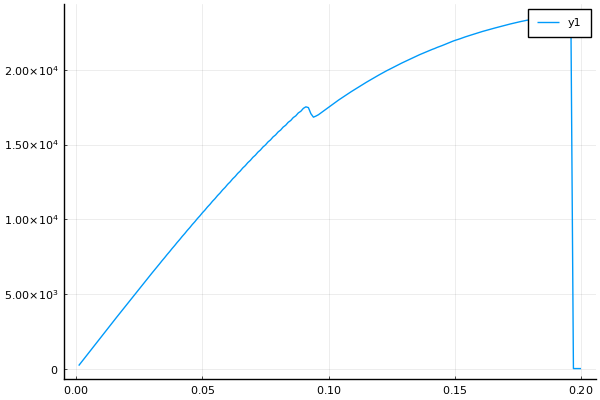

In [29]:
plot(Displacement,Load)

In [30]:
Load

200-element Vector{Float64}:
   215.84029817220323
   431.680596344393
   647.447856355487
   863.263808473917
  1078.8363610671215
  1294.6036332787992
  1509.8599802136948
  1725.554263088626
  1940.3731869464204
  2155.970207661078
  2370.2308811587136
  2585.706415619853
  2799.2885102412606
     ⋮
 23605.693710802378
 23627.647220908846
 23647.417928685292
 23663.82512679549
 23680.54168069591
 23693.25969467439
 23693.743197729236
 23460.413243319927
    16.911993787145946
    16.65871927464995
    16.742837709728175
    16.16882757747329

In [37]:
maximum(Load)

23693.743197729236

In [32]:
using DelimitedFiles
Disp = writedlm("DispDataSingleLayerPlatewithSquareInclusion.csv",  Displacement, ',')
Force = writedlm("LoadDataSingleLayerPlatewithSquareInclusion.csv",  Load, ',')

In [34]:
timet2 = time()

1.667316448984033e9

In [1]:
println(timet2 - timet1)

LoadError: UndefVarError: timet2 not defined